https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

Импортируем библиотеки

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Уберем последние 12 колонок и в колонке diagnosis заменим значения M и B на 0 и 1 соответственно

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop(columns=df.columns[20:32], axis=1, inplace=True)
df = df.replace({'diagnosis': {'M': 0, 'B': 1}})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756


Для использования методов, использующих метрику, необходимо произвести нормализацию значений признаков

In [3]:
vMin = df.min(axis=0)
x = (df - vMin) / (df.max(axis=0) - vMin)

Разделим выборку на обучающую и тестовую и применим алгоритм классификации по k ближайших соседей

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(x, df.diagnosis, test_size=0.33, shuffle=True)

In [5]:
# 3 соседа
Knn3 = KNeighborsClassifier(n_neighbors=3)
Knn3.fit(xTrain, yTrain)
yPred3 = Knn3.predict(xTest)
yPred3

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [6]:
# 5 соседей
Knn5 = KNeighborsClassifier(n_neighbors=5)
Knn5.fit(xTrain, yTrain)
yPred5 = Knn3.predict(xTest)
yPred5

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [7]:
# 7 соседей
Knn7 = KNeighborsClassifier(n_neighbors=7)
Knn7.fit(xTrain, yTrain)
yPred7 = Knn3.predict(xTest)
yPred7

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

Теперь сравним предсказание с метками тестовой выборки

In [8]:
pd.concat([yPred3==yTest, yPred5==yTest, yPred7==yTest], axis=1)

,diagnosis,diagnosis,diagnosis
22,True,True,True
96,True,True,True
33,True,True,True
37,True,True,True
289,True,True,True
...,...,...,...
566,True,True,True
182,True,True,True
439,True,True,True
202,True,True,True


Сравним, какой из параметров (3, 5, 7) даст лучший результат

In [9]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred3, return_counts=True)
print(f"3 соседа:\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred5, return_counts=True)
print(f"5 соседей:\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred7, return_counts=True)
print(f"7 соседей:\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

3 соседа:
Кол-во меток классов в тестовой: [ 73 115],
Кол-во меток классов в предсказании: [ 73 115]
5 соседей:
Кол-во меток классов в тестовой: [ 73 115],
Кол-во меток классов в предсказании: [ 73 115]
7 соседей:
Кол-во меток классов в тестовой: [ 73 115],
Кол-во меток классов в предсказании: [ 73 115]


Результаты оказались одинаковыми

Теперь построим Cofusion Matrix

In [10]:
conMat3 = confusion_matrix(yTest, yPred3)
print(f'3 соседа:\n{conMat3}')

conMat5 = confusion_matrix(yTest, yPred5)
print(f'5 соседей:\n{conMat5}')

conMat7 = confusion_matrix(yTest, yPred7)
print(f'7 соседей:\n{conMat7}')

3 соседа:
[[ 73   0]
 [  0 115]]
5 соседей:
[[ 73   0]
 [  0 115]]
7 соседей:
[[ 73   0]
 [  0 115]]


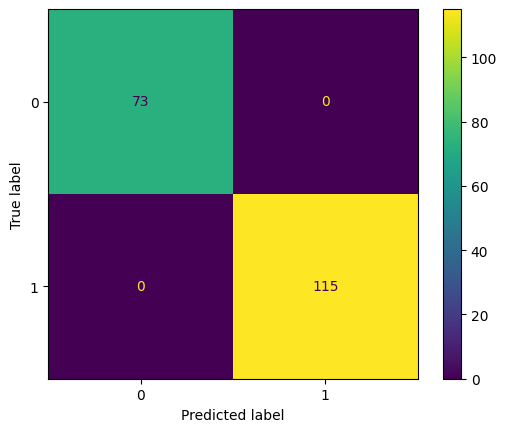

In [11]:
import matplotlib.pyplot as plt

cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat5, display_labels=[0,1])
cmDisp.plot()
plt.show()

TP - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FP - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу

TN - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)

FN - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса

In [12]:
print('3 соседа:\n', classification_report(yTest, yPred3))
print('5 соседей:\n',classification_report(yTest, yPred5))
print('7 соседей:\n',classification_report(yTest, yPred7))

3 соседа:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       115

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

5 соседей:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       115

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

7 соседей:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       115

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      

Выберем в качестве X и Y числовые переменные и разделим выборку на обучающую и тестовую

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df)
y = df.symmetry_mean

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25)

Теперь построим регрессионную модель KNN

In [14]:
Regr = KNeighborsRegressor(n_neighbors=5)
Regr.fit(xTrain, yTrain)
YPred = Regr.predict(xTest)
YPred

array([0.17032, 0.15726, 0.1869 , 0.1811 , 0.15154, 0.17536, 0.1731 ,
       0.21586, 0.18952, 0.17842, 0.1713 , 0.16946, 0.17814, 0.18696,
       0.14824, 0.20434, 0.1666 , 0.14692, 0.16452, 0.16976, 0.18962,
       0.16022, 0.18966, 0.18896, 0.17878, 0.15664, 0.22162, 0.1919 ,
       0.15548, 0.15844, 0.15778, 0.22538, 0.168  , 0.1539 , 0.1842 ,
       0.158  , 0.1727 , 0.1661 , 0.19508, 0.15844, 0.184  , 0.2471 ,
       0.17796, 0.16184, 0.19334, 0.1625 , 0.17568, 0.14458, 0.1679 ,
       0.2076 , 0.17734, 0.16074, 0.189  , 0.15144, 0.1879 , 0.16364,
       0.1858 , 0.1767 , 0.17024, 0.15268, 0.226  , 0.16096, 0.15406,
       0.14434, 0.19028, 0.20904, 0.1811 , 0.19914, 0.21572, 0.17498,
       0.20102, 0.18202, 0.1988 , 0.17832, 0.17924, 0.1868 , 0.20176,
       0.18856, 0.19814, 0.1777 , 0.17958, 0.19254, 0.19834, 0.17984,
       0.17556, 0.19202, 0.18672, 0.1775 , 0.19648, 0.17264, 0.16164,
       0.1687 , 0.17714, 0.16596, 0.1959 , 0.18722, 0.16074, 0.18844,
       0.21402, 0.16

In [15]:
np.array(yTest)

array([0.172 , 0.135 , 0.1897, 0.1538, 0.1373, 0.1565, 0.1633, 0.1648,
       0.2131, 0.1649, 0.1739, 0.1705, 0.1634, 0.1979, 0.1395, 0.2197,
       0.1669, 0.1506, 0.1602, 0.1735, 0.1927, 0.1544, 0.1875, 0.1993,
       0.1967, 0.1589, 0.2251, 0.2129, 0.1405, 0.1673, 0.1618, 0.2521,
       0.1707, 0.1203, 0.1959, 0.1517, 0.1587, 0.1594, 0.1971, 0.159 ,
       0.1907, 0.2906, 0.1735, 0.181 , 0.1727, 0.1583, 0.1683, 0.1353,
       0.1547, 0.2128, 0.1792, 0.1613, 0.2054, 0.1342, 0.2101, 0.1584,
       0.1742, 0.1811, 0.162 , 0.1422, 0.304 , 0.1631, 0.1487, 0.1432,
       0.1832, 0.2082, 0.1723, 0.2057, 0.2196, 0.1807, 0.2086, 0.1806,
       0.1765, 0.1797, 0.1776, 0.1912, 0.2217, 0.1925, 0.2061, 0.1812,
       0.188 , 0.1917, 0.1964, 0.1779, 0.1714, 0.1989, 0.1505, 0.1714,
       0.1741, 0.172 , 0.1551, 0.168 , 0.1727, 0.1617, 0.2341, 0.1937,
       0.106 , 0.2152, 0.2569, 0.1607, 0.1895, 0.2069, 0.1794, 0.1472,
       0.1991, 0.1883, 0.1564, 0.2025, 0.2248, 0.2378, 0.1872, 0.2069,
      

In [16]:
np.c_[YPred, yTest]

array([[0.17032, 0.172  ],
       [0.15726, 0.135  ],
       [0.1869 , 0.1897 ],
       [0.1811 , 0.1538 ],
       [0.15154, 0.1373 ],
       [0.17536, 0.1565 ],
       [0.1731 , 0.1633 ],
       [0.21586, 0.1648 ],
       [0.18952, 0.2131 ],
       [0.17842, 0.1649 ],
       [0.1713 , 0.1739 ],
       [0.16946, 0.1705 ],
       [0.17814, 0.1634 ],
       [0.18696, 0.1979 ],
       [0.14824, 0.1395 ],
       [0.20434, 0.2197 ],
       [0.1666 , 0.1669 ],
       [0.14692, 0.1506 ],
       [0.16452, 0.1602 ],
       [0.16976, 0.1735 ],
       [0.18962, 0.1927 ],
       [0.16022, 0.1544 ],
       [0.18966, 0.1875 ],
       [0.18896, 0.1993 ],
       [0.17878, 0.1967 ],
       [0.15664, 0.1589 ],
       [0.22162, 0.2251 ],
       [0.1919 , 0.2129 ],
       [0.15548, 0.1405 ],
       [0.15844, 0.1673 ],
       [0.15778, 0.1618 ],
       [0.22538, 0.2521 ],
       [0.168  , 0.1707 ],
       [0.1539 , 0.1203 ],
       [0.1842 , 0.1959 ],
       [0.158  , 0.1517 ],
       [0.1727 , 0.1587 ],
 

Метод score вычисляет коэффициент детерминации 𝑅^2 - доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью, т.е. насколько хорошо полученная модель соответствует реальным данным (чем ближе к 1, тем лучше)

Коэффициент детерминации R^2

In [17]:
rsq = Regr.score(xTest, yTest)
rsq

0.6879006045302272

In [18]:
mse = ((YPred - yTest)**2).mean()
mae = np.abs(YPred - yTest).mean()
print(f'R2: {rsq}, MSE: {mse}, MAE: {mae}')

R2: 0.6879006045302272, MSE: 0.0002811209986013987, MAE: 0.011693566433566433


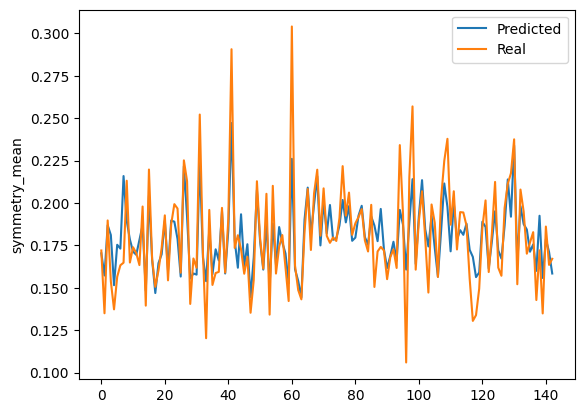

In [40]:
yTest = yTest.to_numpy().astype(float)
plt.plot(YPred)
plt.plot(yTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("symmetry_mean")
plt.show()

Построим линейную регрессионную модель

In [20]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

diag_M = df[df['diagnosis'] == 0][['radius_mean','texture_mean']].to_numpy()
norm = MinMaxScaler()
temp = norm.fit_transform(diag_M)
radius_mean = diag_M[:,1]
texture_mean = diag_M[:,0].reshape(-1,1)

#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(texture_mean, radius_mean)

#построение предсказания
radius_meanPred = linReg.predict(texture_mean)

print(f"Параметры прямой: b0 = {linReg.intercept_}, наклон: {linReg.coef_[0]}")
print(f"y = {linReg.intercept_} + {linReg.coef_[0]}x")

rsq = linReg.score(texture_mean, radius_mean)
mse = ((texture_mean - radius_mean)**2).mean()
mae = np.abs(texture_mean - radius_mean).mean()
print(f"R2: {rsq}, MSE: {mse}, MAE: {mae}")

Параметры прямой: b0 = 19.410719469101814, наклон: 0.12564894507752727
y = 19.410719469101814 + 0.12564894507752727x
R2: 0.01134574679467848, MSE: 41.59081185475258, MAE: 5.188262281950872


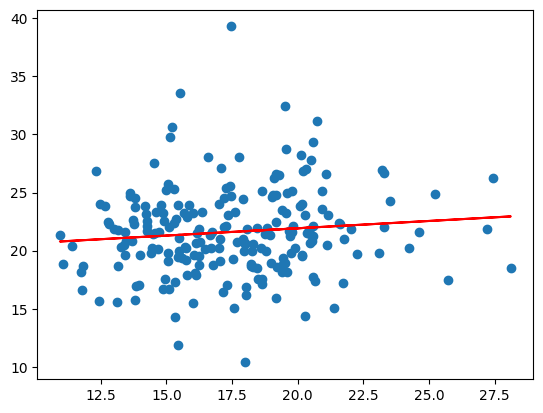

In [21]:
plt.scatter(texture_mean, radius_mean)
plt.plot(texture_mean, radius_meanPred, color="red")

plt.show()

Построим гребневую регрессионную модель

In [22]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(texture_mean, radius_mean)

#построение предсказания
radius_meanPred = rig.predict(texture_mean)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")

rsq = rig.score(texture_mean, radius_mean)
mse = ((texture_mean - radius_mean)**2).mean()
mae = np.abs(texture_mean - radius_mean).mean()
print(f"R2: {rsq}, MSE: {mse}, MAE: {mae}")

Параметры прямой: b0 = 19.411225857334905, наклон: 0.12561994701549395
y = 19.411225857334905 + 0.12561994701549395 x
R2: 0.011345746190377426, MSE: 41.59081185475258, MAE: 5.188262281950872


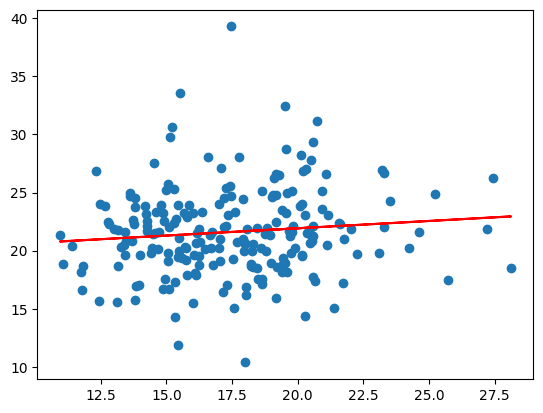

In [23]:
plt.scatter(texture_mean, radius_mean)
plt.plot(texture_mean, radius_meanPred, color="red")

plt.show()

Построим регрессионную модель LASSO

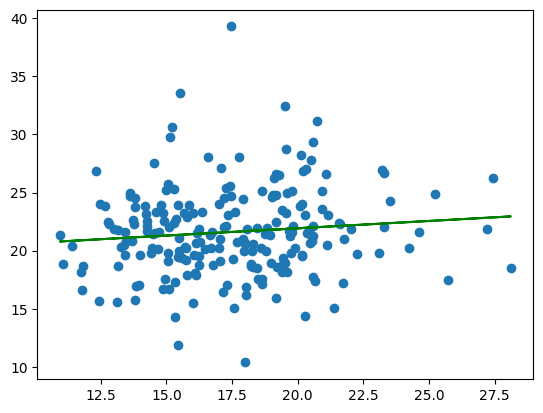

R2: 0.011345746190377426, MSE: 41.59081185475258, MAE: 5.188262281950872


In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

lasso = Lasso()

#поиск параметра "альфа" на логарифмической сетке GridSearchCV от 10^-13 до 10^13
parameters = {"alpha" : np.logspace(-13,13,31)}
lassoCV = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)

lassoCV.fit(texture_mean, radius_mean)
lassoPred = lassoCV.predict(texture_mean)

plt.scatter(texture_mean, radius_mean)
plt.plot(texture_mean,lassoPred, color="green")
plt.show()

lassoMSE = ((lassoPred - radius_mean)**2).mean()
lassoMAE = np.abs(lassoPred - radius_mean).mean()
lassoR2 = r2_score(radius_mean, lassoPred)
print(f"R2: {rsq}, MSE: {mse}, MAE: {mae}")

Построим логистическую регрессионную модель

<Axes: >

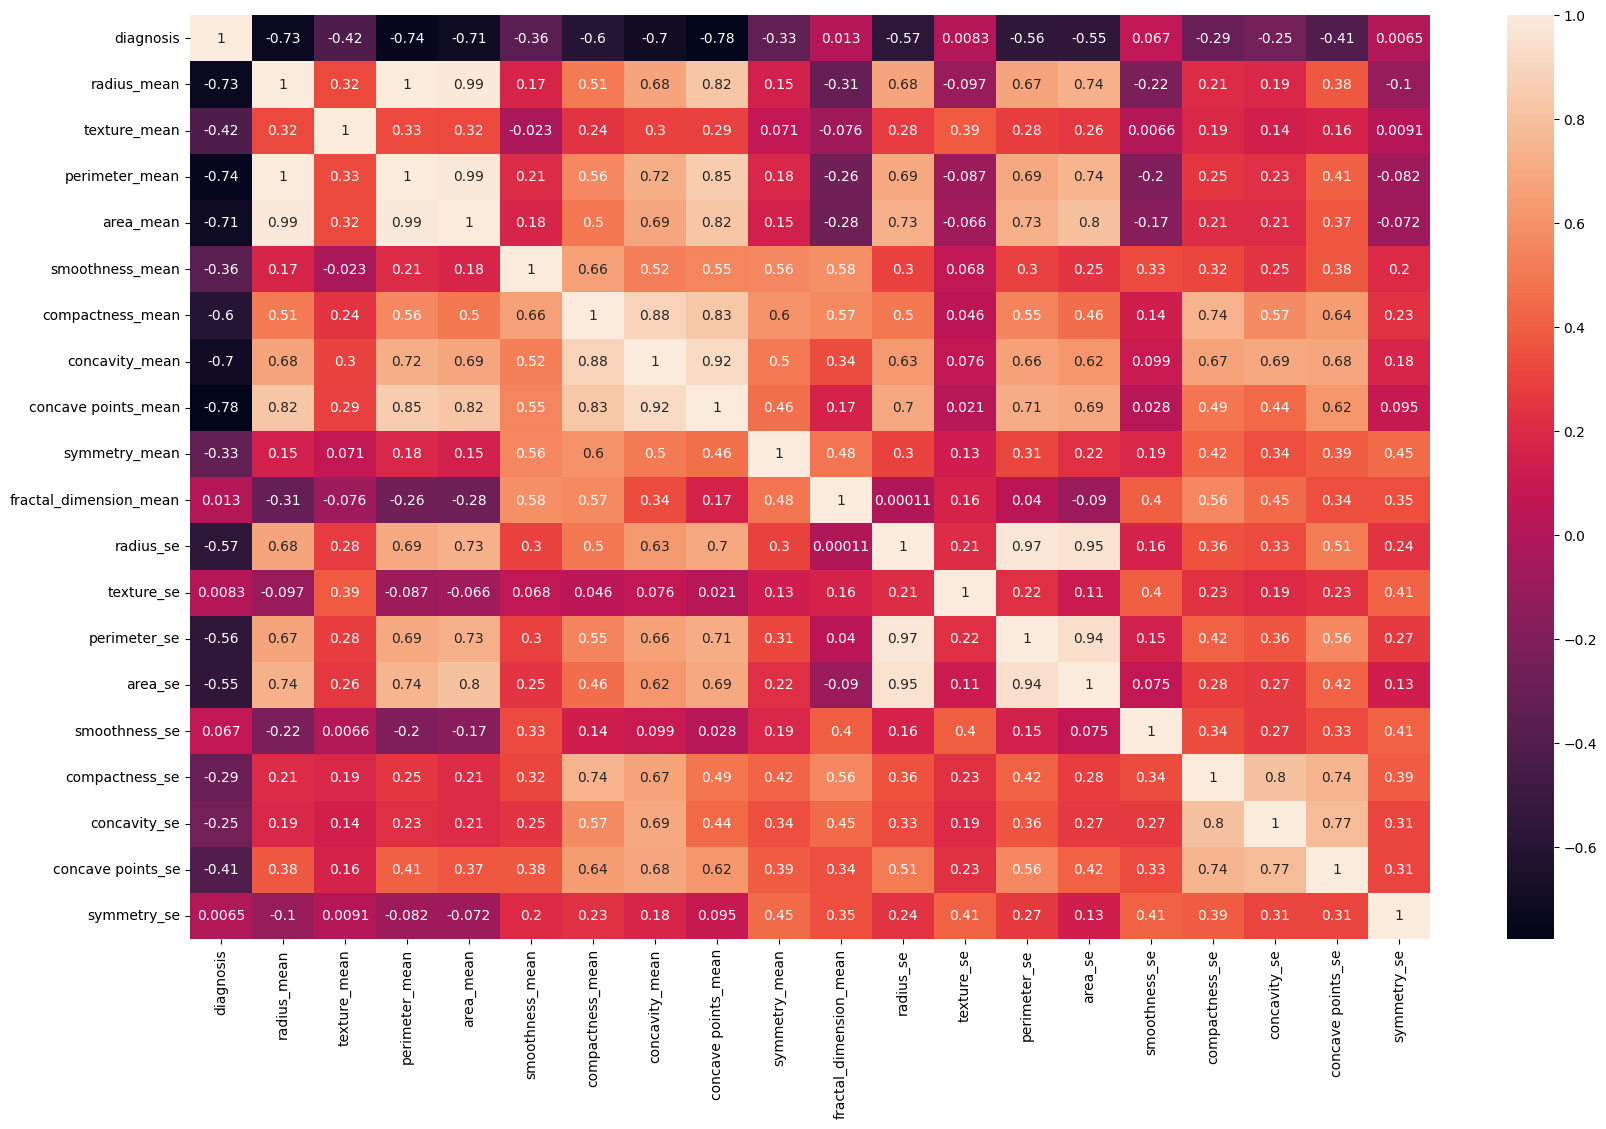

In [26]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True)

Разделим зависимую переменную и предикторы

In [34]:
X = df.drop("diagnosis", axis = 1).copy()
Y = df.diagnosis
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756


In [35]:
Y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

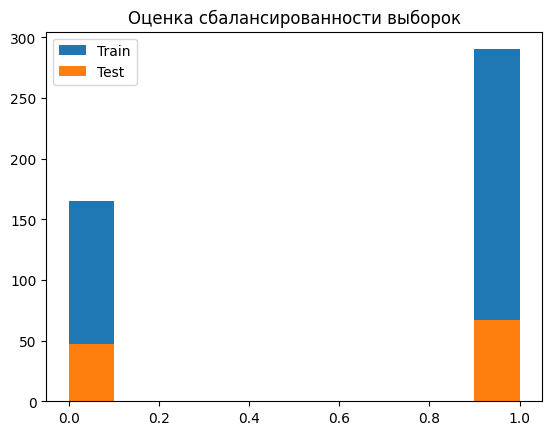

In [36]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

plt.hist(Ytrain, label = "Train")
plt.hist(Ytest, label = "Test")
plt.legend()
plt.title("Оценка сбалансированности выборок")
plt.show()

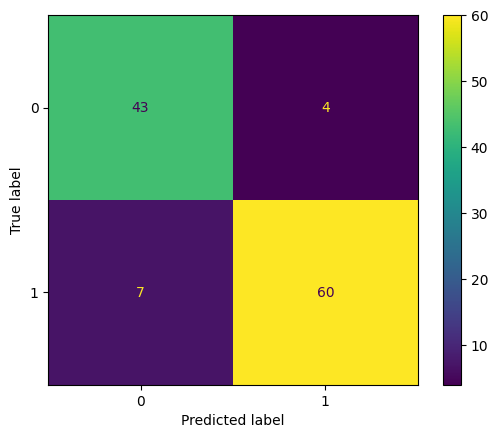

In [37]:
from sklearn.linear_model import LogisticRegression

logRes = LogisticRegression(random_state = 0, max_iter = 1000)
lrModel = logRes.fit(Xtrain, Ytrain)
Ypred = lrModel.predict(Xtest)
Yprob = lrModel.predict_proba(Xtest)[:,1] #для ROC-кривой

confMatr = confusion_matrix(Ytest, Ypred)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

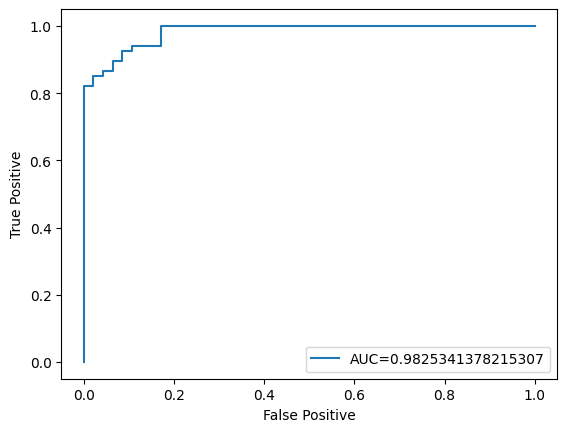

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

auc = roc_auc_score( Ytest, Yprob )
fpr, tpr, thresholds = roc_curve(Ytest, Yprob)
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()